#Dimensionalidad


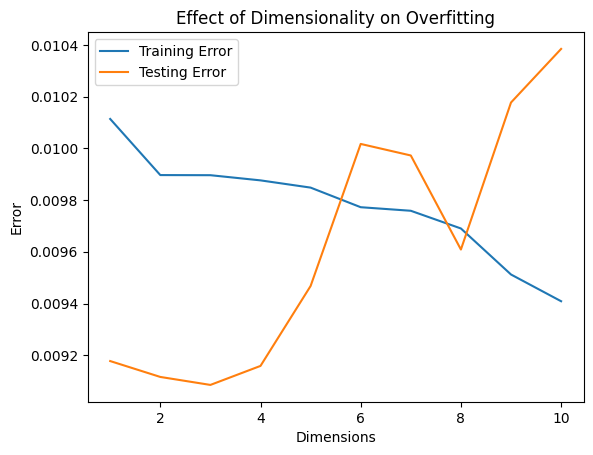

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

np.random.seed(0)
X = np.random.rand(100, 1)
y = 2 * X.squeeze() + np.random.normal(0, 0.1, 100)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_errors = []
test_errors = []

dimensions = range(1, 11)

for d in dimensions:
    poly = PolynomialFeatures(degree=d)
    X_poly = poly.fit_transform(X_train)

    model = LinearRegression()
    model.fit(X_poly, y_train)

    train_error = np.mean((model.predict(X_poly) - y_train) ** 2)
    train_errors.append(train_error)

    X_test_poly = poly.transform(X_test)
    test_error = np.mean((model.predict(X_test_poly) - y_test) ** 2)
    test_errors.append(test_error)

plt.plot(dimensions, train_errors, label='Training Error')
plt.plot(dimensions, test_errors, label='Testing Error')
plt.xlabel('Dimensions')
plt.ylabel('Error')
plt.title('Effect of Dimensionality on Overfitting')
plt.legend()
plt.show()


Métricas adicionales para el conjunto de entrenamiento:
R2: 0.9628069710571928
MAE: 0.031410720729470466
RMSE: 0.046378310655226525

Métricas adicionales para el conjunto de prueba:
R2: 0.7601550004997824
MAE: 0.11074047858705538
RMSE: 0.12731779367473414


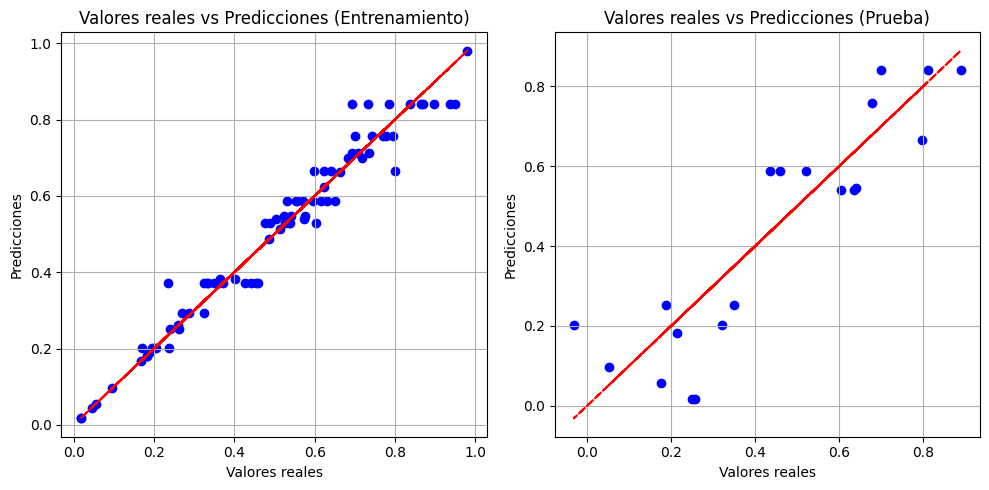

In [3]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline
import numpy as np


# Generamos datos de entrenamiento
np.random.seed(0)
X = np.random.rand(100,2)  # 100 muestras, 20 dimensiones
y = np.dot(X, np.random.rand(2)) + np.random.normal(0, 0.1, 100)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

model = DecisionTreeRegressor(max_depth=5)

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_r2 = r2_score(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("Métricas adicionales para el conjunto de entrenamiento:")
print("R2:", train_r2)
print("MAE:", train_mae)
print("RMSE:", train_rmse)
print("\nMétricas adicionales para el conjunto de prueba:")
print("R2:", test_r2)
print("MAE:", test_mae)
print("RMSE:", test_rmse)

# Graficamos los valores reales vs las predicciones para los datos de entrenamiento
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, color='blue')
plt.plot(y_train, y_train, color='red', linestyle='--')
plt.title("Valores reales vs Predicciones (Entrenamiento)")
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.grid()

# Graficamos los valores reales vs las predicciones para los datos de prueba
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, color='blue')
plt.plot(y_test, y_test, color='red', linestyle='--')
plt.title("Valores reales vs Predicciones (Prueba)")
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.grid()

plt.tight_layout()
plt.show()


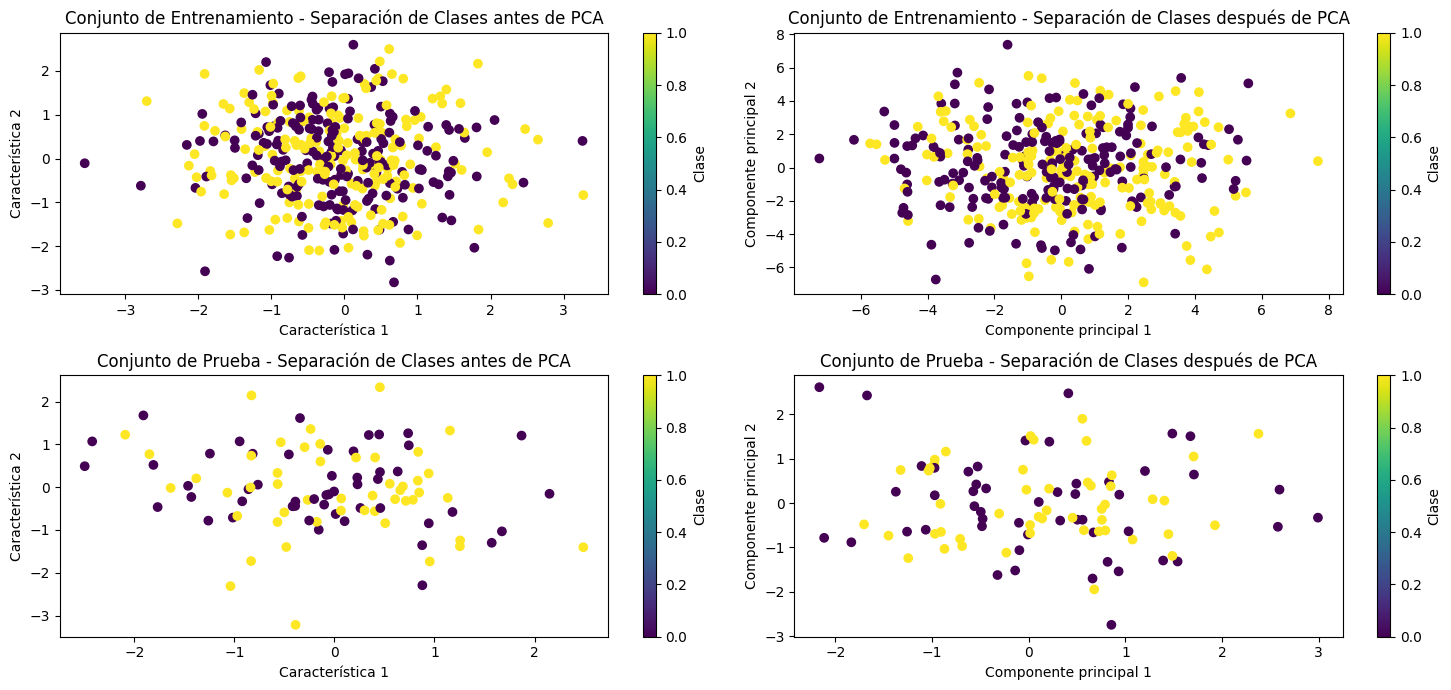

Precisión del clasificador SVM en el conjunto de entrenamiento antes de la reducción de dimensionalidad: 1.0
Precisión del clasificador SVM en el conjunto de prueba antes de la reducción de dimensionalidad: 0.7
Precisión del clasificador SVM en el conjunto de entrenamiento después de la reducción de dimensionalidad: 0.8025
Precisión del clasificador SVM en el conjunto de prueba después de la reducción de dimensionalidad: 0.47


In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples=500, n_features=1000, n_classes=2, random_state=24)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_orig = SVC()
svm_orig.fit(X_train, y_train)

y_train_pred_orig = svm_orig.predict(X_train)
train_accuracy_orig = accuracy_score(y_train, y_train_pred_orig)

y_test_pred_orig = svm_orig.predict(X_test)
test_accuracy_orig = accuracy_score(y_test, y_test_pred_orig)

# Aplicamos PCA para reducir la dimensionalidad
pca = PCA(n_components=10)  # Reducimos a 10 componentes principales
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

svm_pca = SVC()
svm_pca.fit(X_train_pca, y_train)

y_train_pred_pca = svm_pca.predict(X_train_pca)
train_accuracy_pca = accuracy_score(y_train, y_train_pred_pca)

y_test_pred_pca = svm_pca.predict(X_test_pca)
test_accuracy_pca = accuracy_score(y_test, y_test_pred_pca)

plt.figure(figsize=(15, 7))

# Gráfica antes de PCA
plt.subplot(2, 2, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Conjunto de Entrenamiento - Separación de Clases antes de PCA')
plt.colorbar(label='Clase')

# Gráfica después de PCA
plt.subplot(2, 2, 2)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.title('Conjunto de Entrenamiento - Separación de Clases después de PCA')
plt.colorbar(label='Clase')

# Gráfica antes de PCA
plt.subplot(2, 2, 3)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Conjunto de Prueba - Separación de Clases antes de PCA')
plt.colorbar(label='Clase')

# Gráfica después de PCA
plt.subplot(2, 2, 4)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='viridis')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.title('Conjunto de Prueba - Separación de Clases después de PCA')
plt.colorbar(label='Clase')

plt.tight_layout()
plt.show()

print("Precisión del clasificador SVM en el conjunto de entrenamiento antes de la reducción de dimensionalidad:", train_accuracy_orig)
print("Precisión del clasificador SVM en el conjunto de prueba antes de la reducción de dimensionalidad:", test_accuracy_orig)
print("Precisión del clasificador SVM en el conjunto de entrenamiento después de la reducción de dimensionalidad:", train_accuracy_pca)
print("Precisión del clasificador SVM en el conjunto de prueba después de la reducción de dimensionalidad:", test_accuracy_pca)


# Roc

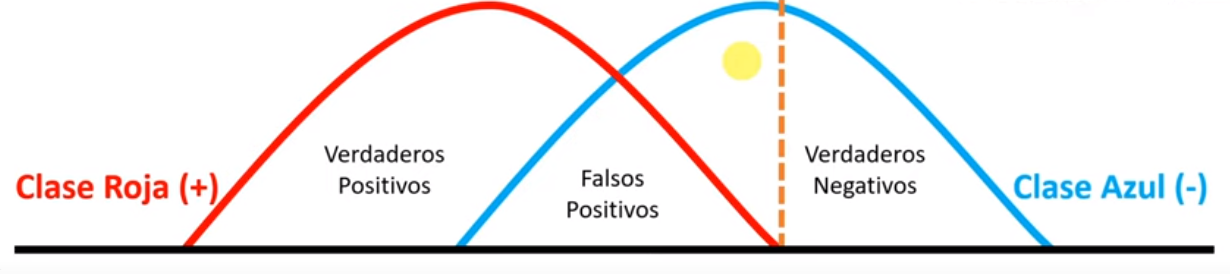

In [ ]:
from IPython.display import Image

Image('/content/drive/MyDrive/Colab Notebooks/curvaRoc.png')


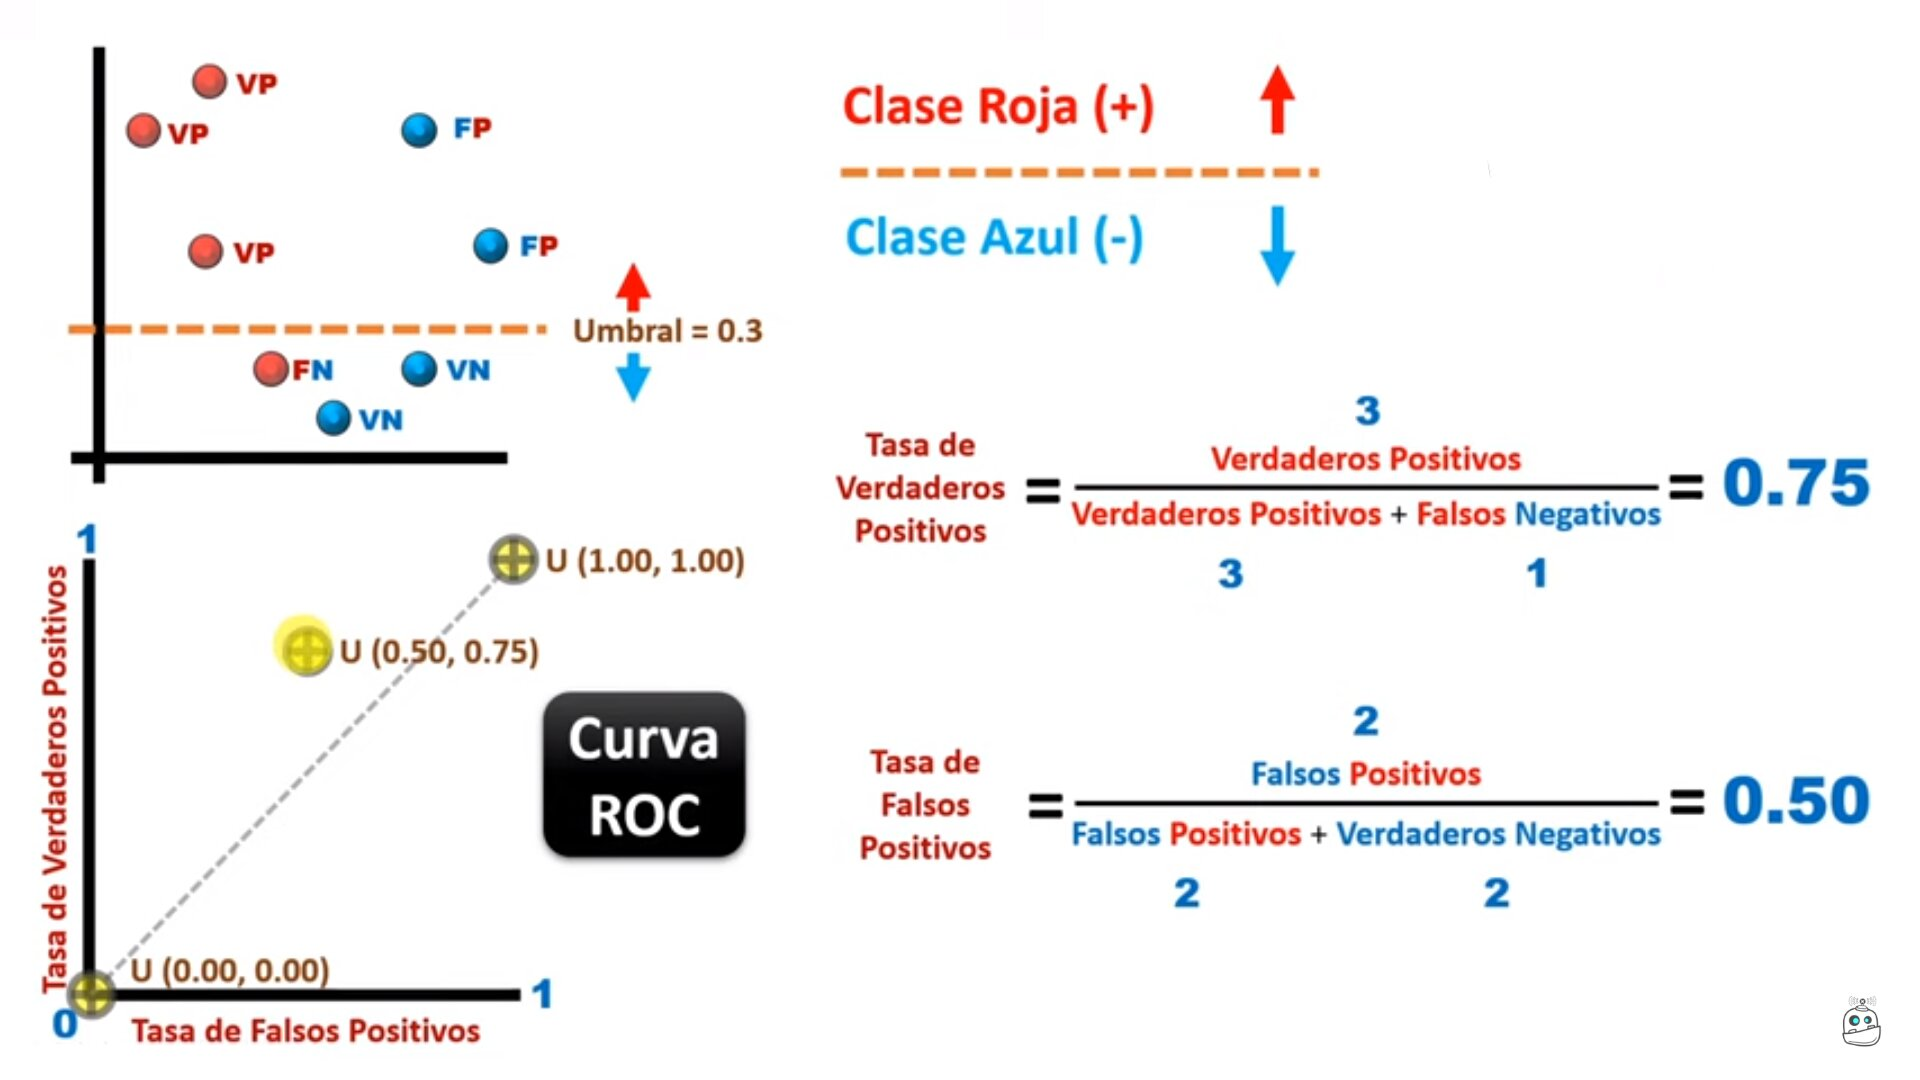

In [ ]:
from IPython.display import Image

Image('/content/drive/MyDrive/Colab Notebooks/roc2.jpg')


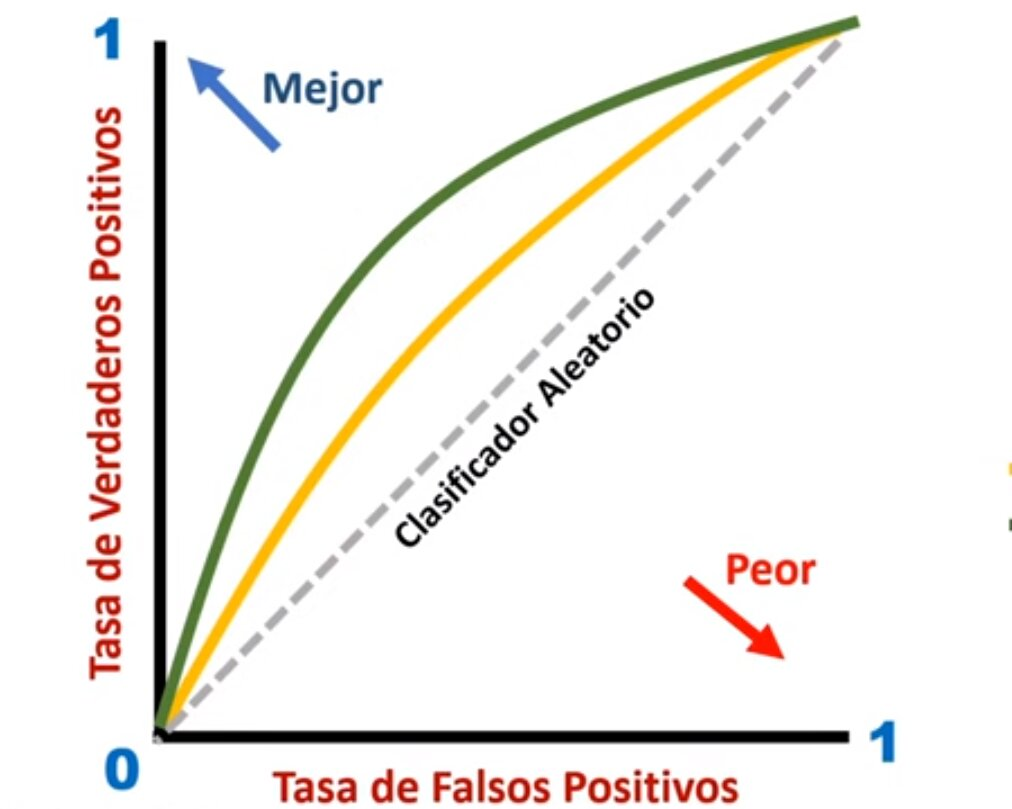

In [ ]:
from IPython.display import Image

Image('/content/drive/MyDrive/Colab Notebooks/roc3.jpg')


Curva ROC


*   Muestra la capacidad del modelo para distinguir entre clases (positiva y negativa).


*   Cuanto más alta sea la curva, mejor será el rendimiento del modelo.

*  Un AUC (Área Bajo la Curva) de 1 indica un modelo perfecto, mientras que un AUC de 0.5 indica un modelo que no es mejor que el azar.

## Calcular
1. Obtener etiquetas verdaderas y predicciones del modelo:

2. Calcular la Tasa de Verdaderos Positivos (TPR) y la Tasa de Falsos Positivos (FPR) para diferentes umbrales de decisión:
   - Inicializar TPR y FPR en 0.
   - Ajustar un umbral de decisión inicialmente al mínimo valor de predicción.
   - Por cada predicción, si su probabilidad es mayor que el umbral de decisión, actualizar TPR y FPR dependiendo de si la etiqueta verdadera es positiva o negativa.
   - Incrementar el umbral de decisión y repetir el proceso hasta alcanzar el máximo valor de predicción.

4. Construir la Curva ROC:
   - Graficar FPR en el eje x y TPR en el eje y.
   - Conectar los puntos (FPR, TPR) para cada umbral de decisión.

5. Calcular el Área Bajo la Curva (AUC):
   - Utilizar la regla del trapecio para calcular el área bajo la curva ROC.
   - Sumar las áreas de los trapecios formados por los puntos consecutivos de la curva ROC.

6. Interpretar los resultados:
   - Un AUC de 1.0 indica un modelo perfecto, mientras que un AUC de 0.5 indica un modelo que predice al azar.
   - Una Curva ROC más cercana al punto (0,1) indica un mejor rendimiento del modelo en la clasificación.






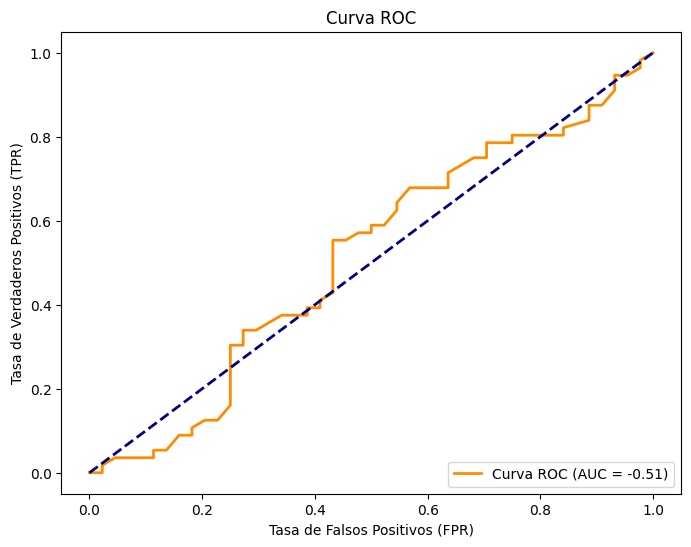

In [5]:
np.random.seed(42)
y_true = np.random.randint(0, 2, size=100)
y_pred = np.random.rand(100)

# Calculamos la tasa de verdaderos positivos (TPR) y la tasa de falsos positivos (FPR)
total_positivos = np.sum(y_true)  # Total de positivos en las etiquetas verdaderas
total_negativos = len(y_true) - total_positivos  # Total de negativos en las etiquetas verdaderas

tpr_values = []
fpr_values = []

# Iteramos sobre diferentes umbrales de decisión
for umbral in np.linspace(0, 1, num=100):
    # Calculamos las etiquetas predichas basadas en el umbral de decisión
    y_pred_labels = np.where(y_pred >= umbral, 1, 0)

    true_positives = np.sum((y_true == 1) & (y_pred_labels == 1))
    false_positives = np.sum((y_true == 0) & (y_pred_labels == 1))

    # Calculamos la tasa de verdaderos positivos (TPR) y la tasa de falsos positivos (FPR)
    tpr = true_positives / total_positivos
    fpr = false_positives / total_negativos

    # Almacenamos los valores de TPR y FPR
    tpr_values.append(tpr)
    fpr_values.append(fpr)

# Calculamos el área bajo la curva ROC (AUC) utilizando la regla del trapecio
auc_value = np.trapz(tpr_values, fpr_values)

# Visualizamos la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_values, tpr_values, color='darkorange', lw=2, label=f'Curva ROC (AUC = {auc_value:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()


In [6]:
from sklearn.metrics import roc_auc_score
auc_value = roc_auc_score(y_true, y_pred)
print("AUC:", auc_value)

AUC: 0.5121753246753247



**Interpretación del AUC:**
- AUC = 1: El modelo es perfecto para distinguir entre las dos clases.
- AUC = 0.5: El modelo no es mejor que el azar.
- AUC > 0.5: El modelo es mejor que el azar.
- AUC > 0.9: El modelo tiene un buen rendimiento.
- AUC > 0.8: El modelo tiene un rendimiento muy bueno.